**Importing Libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.svm import LinearSVC as Classifier
from sklearn.model_selection import train_test_split
from pylab import *
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

<B> Random Choice Classifier

In [0]:
def random_classifier(X):
    return np.random.choice([0,1])

,Accuracy
count,100.000000
mean,0.497172
std,0.018120
min,0.441019
25%,0.485255
50%,0.497989
75%,0.508378
max,0.548257


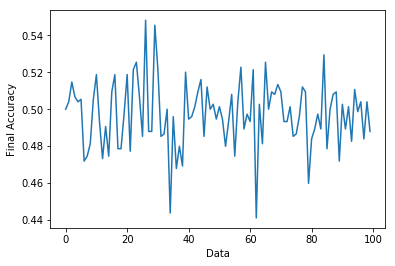

In [6]:
accuracy = [[]]*100
for j in range(100):
    classifications = [[]]*746
    for i in range(746):
        classifications[i] = random_classifier(np_X_data_1[i,:,:])
    accuracy[j] = len(np.where(classifications == np_Y_data_1)[0])/len(classifications)    
plot(accuracy)
xlabel('Data')
ylabel('Final Accuracy')
df = {'Accuracy': accuracy}
table_SVC = pd.DataFrame(data=df)
table_SVC.describe()

**Neural Network**

In [7]:
inception = InceptionV3(
    weights='imagenet',
    include_top=False,
    pooling='avg',
    input_shape=(299,299,3)
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
87916544/87910968 [==============================] - 1s 0us/step


**SGDClassifier, GradientBoostingClassifier, RandomForestClassifier, DeDecisionTreeClassifier and GaussianNB**

In [8]:
#########################################################Test Size####################################################################################
list_of_accuracy = np.array([0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22])
##############################################List of accuracy for classifiers########################################################################
set_of_accuracy=[]
set_of_accuracy_sgd=[]
set_of_accuracy_gbc=[]
set_of_accuracy_rfc=[]
set_of_accuracy_gnb=[]
set_of_accuracy_dtc=[]
##############################################List of precision for classifiers########################################################################
set_of_precision = []
set_of_precision_sgd = []
set_of_precision_gbc = []
set_of_precision_rfc = []
set_of_precision_gnb = []
set_of_precision_dtc = []
##############################################List of precision for classifiers########################################################################
set_of_f1 = []
set_of_f1_sgd = []
set_of_f1_gbc = []
set_of_f1_rfc = []
set_of_f1_gnb = []
set_of_f1_dtc = []
############################################Train and testing classifer##############################################################################
for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features = inception.predict(X_train)
    test_features = inception.predict(X_test)
################################################Linear SVM#####################################################################
    clf = Classifier()
    clf.fit(training_features, y_train)
    y_predict = clf.predict(test_features)
    acc = clf.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    set_of_accuracy.append(acc)  
    set_of_precision.append(precision)
    set_of_f1.append(F1)
###################################################SGD###########################################################################    
    clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
    clf_sgd.fit(training_features, y_train)
    y_predict = clf_sgd.predict(test_features)
    acc = clf_sgd.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    set_of_accuracy_sgd.append(acc)  
    set_of_precision_sgd.append(precision)
    set_of_f1_sgd.append(F1)
###################################################GBD###########################################################################
    clf_gbc = GradientBoostingClassifier()
    clf_gbc.fit(training_features, y_train)
    y_predict_gbc = clf_gbc.predict(test_features)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    acc_gbc = clf_gbc.score(test_features, y_test)
    set_of_accuracy_gbc.append(acc_gbc)  
    set_of_precision_gbc.append(precision)
    set_of_f1_gbc.append(F1)
###################################################RFC###########################################################################
    regr =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    regr.fit(training_features, y_train)
    y_predict_regr = regr.predict(test_features)
    acc_regr = regr.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    set_of_accuracy_rfc.append(acc_regr)
    set_of_precision_rfc.append(precision)
    set_of_f1_rfc.append(F1)
####################################################GNB###########################################################################
    gnb = GaussianNB()
    gnb.fit(training_features, y_train)
    y_predict_gnb = gnb.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    acc_gbn = gnb.score(test_features, y_test)
    set_of_accuracy_gnb.append(acc_gbn)  
    set_of_precision_gnb.append(precision)
    set_of_f1_gnb.append(F1)
#####################################################DTC##########################################################################
    clf_dtc = DecisionTreeClassifier(random_state=0)
    clf_dtc.fit(training_features, y_train)
    y_predict_dtc = clf_dtc.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    acc_dtc = clf_dtc.score(test_features, y_test)
    set_of_accuracy_dtc.append(acc_dtc)   
    set_of_precision_dtc.append(precision)
    set_of_f1_dtc.append(F1)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Linear SVC**

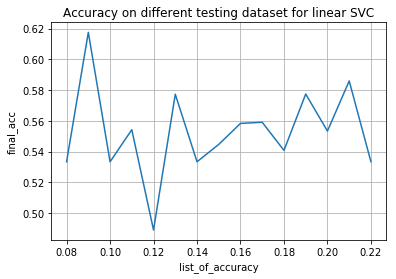

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.552731,0.563834,0.544219
std,0.029762,0.038525,0.034949
min,0.488889,0.477601,0.467648
25%,0.533333,0.549473,0.527455
50%,0.553333,0.561883,0.550650
75%,0.568187,0.583155,0.565772
max,0.617647,0.651011,0.605815


In [9]:
plot(list_of_accuracy,set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for linear SVC')
grid(True)
show()
df = {'Accuracy': set_of_accuracy, 'Precision':set_of_precision, 'F1 Score':set_of_f1}
table_SVC = pd.DataFrame(data=df)
table_SVC.describe()

**Stochastic Gradient Descent**

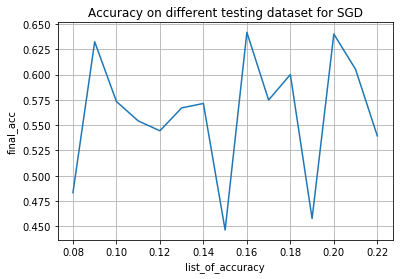

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.562084,0.552295,0.497021
std,0.061168,0.169990,0.120553
min,0.446429,0.211039,0.286596
25%,0.541919,0.567755,0.392046
50%,0.571429,0.600000,0.528710
75%,0.602548,0.641557,0.598910
max,0.641667,0.756692,0.637394


In [10]:
plot(list_of_accuracy,set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()
df_sgd = {'Accuracy': set_of_accuracy_sgd, 'Precision':set_of_precision_sgd, 'F1 Score':set_of_f1_sgd}
table_sgd = pd.DataFrame(data=df_sgd)
# table_sgd
table_sgd.describe()

**Gradient Boosting Classifier**

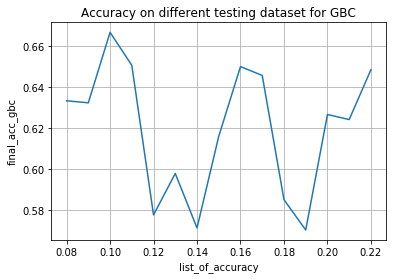

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.619787,0.552295,0.497021
std,0.031837,0.169990,0.120553
min,0.570423,0.211039,0.286596
25%,0.591562,0.567755,0.392046
50%,0.626667,0.600000,0.528710
75%,0.647077,0.641557,0.598910
max,0.666667,0.756692,0.637394


In [11]:
plot(list_of_accuracy,set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc_gbc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()
df_gbc = {'Accuracy': set_of_accuracy_gbc,'Precision':set_of_precision_gbc, 'F1 Score':set_of_f1_gbc}
table_gbc = pd.DataFrame(data=df_gbc)
# table_gbc
table_gbc.describe()

**Random Forest Classifier**

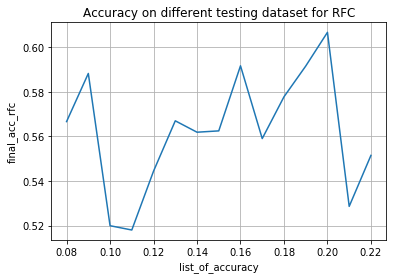

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.562382,0.552295,0.497021
std,0.026676,0.169990,0.120553
min,0.518072,0.211039,0.286596
25%,0.547980,0.567755,0.392046
50%,0.562500,0.600000,0.528710
75%,0.583007,0.641557,0.598910
max,0.606667,0.756692,0.637394


In [12]:
plot(list_of_accuracy,set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc_rfc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()
df_rfc = {'Accuracy': set_of_accuracy_rfc, 'Precision':set_of_precision_rfc, 'F1 Score':set_of_f1_rfc}
table_rfc = pd.DataFrame(data=df_rfc)
table_rfc
table_rfc.describe()

**Decision Tree Classifier**

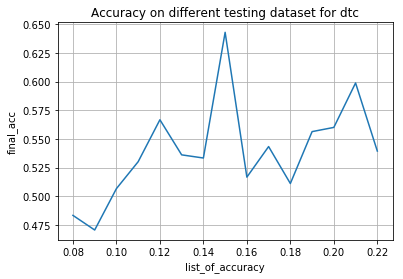

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.539679,0.552295,0.497021
std,0.043171,0.169990,0.120553
min,0.470588,0.211039,0.286596
25%,0.513889,0.567755,0.392046
50%,0.536082,0.600000,0.528710
75%,0.558169,0.641557,0.598910
max,0.642857,0.756692,0.637394


In [13]:
plot(list_of_accuracy,set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for dtc')
grid(True)
show()
df_dtc = {'Accuracy': set_of_accuracy_dtc, 'Precision':set_of_precision_dtc, 'F1 Score':set_of_f1_dtc}
table_dtc = pd.DataFrame(data=df_dtc)
table_dtc
table_dtc.describe()

**Gaussian Naive Bayes**

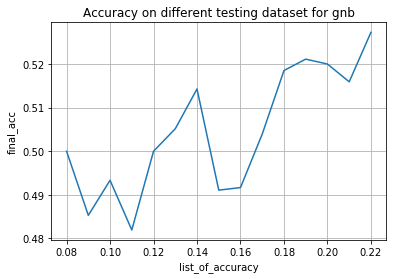

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.504634,0.552295,0.497021
std,0.014261,0.169990,0.120553
min,0.481928,0.211039,0.286596
25%,0.492500,0.567755,0.392046
50%,0.503937,0.600000,0.528710
75%,0.517221,0.641557,0.598910
max,0.527273,0.756692,0.637394


In [14]:
plot(list_of_accuracy,set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for gnb')
grid(True)
show()
df_gnb = {'Accuracy': set_of_accuracy_gnb, 'Precision':set_of_precision_gnb, 'F1 Score':set_of_f1_gnb}
table_gnb = pd.DataFrame(data=df_gnb)
table_gnb
table_gnb.describe()

<B>Comparison of accuracy of all classifier

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


{'boxes': [<matplotlib.lines.Line2D at 0x7f408c527780>,
 'caps': [<matplotlib.lines.Line2D at 0x7f408c256898>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f408c1e4518>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f408c498898>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f408c4d3080>,
  <matplotlib.lines.Line2D at 0x7f408c077080>]}

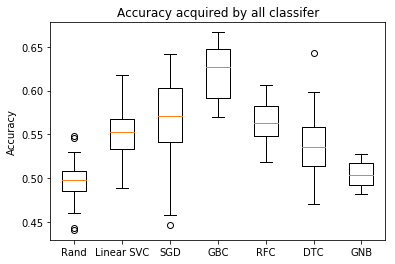

In [15]:
fig = plt.figure()
ylabel('Accuracy')
title('Accuracy acquired by all classifer')
ax = fig.add_subplot(111)
ax.boxplot([accuracy,set_of_accuracy,set_of_accuracy_sgd,set_of_accuracy_gbc,set_of_accuracy_rfc,set_of_accuracy_dtc,set_of_accuracy_gnb], labels=['Rand','Linear SVC', 'SGD','GBC','RFC','DTC','GNB'])

<B>Principal Component Analysis (PCA)

In [16]:
#########################################################Test Size####################################################################################
list_of_accuracy = np.array([0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22])
##############################################List of accuracy for classifiers########################################################################
pca_set_of_accuracy=[]
pca_set_of_accuracy_sgd=[]
pca_set_of_accuracy_gbc=[]
pca_set_of_accuracy_rfc=[]
pca_set_of_accuracy_gnb=[]
pca_set_of_accuracy_dtc=[]
#############################################List of precision for classifier#########################################################################
pca_set_of_precision = []
pca_set_of_precision_sgd = []
pca_set_of_precision_gbc = []
pca_set_of_precision_rfc = []
pca_set_of_precision_gnb = []
pca_set_of_precision_dtc = []
############################################List of F1 Score for classifier##########################################################################
pca_set_of_f1 = []
pca_set_of_f1_sgd = []
pca_set_of_f1_gbc = []
pca_set_of_f1_rfc = []
pca_set_of_f1_gnb = []
pca_set_of_f1_dtc = []
############################################Train and testing classifer##############################################################################
for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features_pca = inception.predict(X_train)
    test_features_pca = inception.predict(X_test)
    pca = PCA(n_components=400)
    pca.fit(training_features_pca)
    pca_training_features = pca.fit_transform(training_features_pca)
    pca_test_features=pca.transform(test_features_pca)
    # linear SVC
    clf = Classifier()
    clf.fit(pca_training_features, y_train)
    y_predict = clf.predict(pca_test_features)
    pca_acc_SVC = clf.score(pca_test_features, y_test)
    pca_set_of_accuracy.append(pca_acc_SVC)
    pca_F1 =f1_score(y_test, y_predict, average='weighted')
    pca_precision = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision.append(pca_precision)
    pca_set_of_f1.append(pca_F1)
#    # SGD
    pca_clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
    pca_clf_sgd.fit(pca_training_features, y_train)
    y_predict = pca_clf_sgd.predict(pca_test_features)
    pca_acc_sgd = pca_clf_sgd.score(pca_test_features, y_test)
    pca_set_of_accuracy_sgd.append(pca_acc_sgd) 
    pca_F1_sgd =f1_score(y_test, y_predict, average='weighted')
    pca_precision_sgd = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_sgd.append(pca_precision_sgd)
    pca_set_of_f1_sgd.append(pca_F1_sgd)
#     #GBC
    pca_clf_gbc = GradientBoostingClassifier()
    pca_clf_gbc.fit(pca_training_features, y_train)
    y_predict_gbc = pca_clf_gbc.predict(pca_test_features)
    pca_acc_gbc = pca_clf_gbc.score(pca_test_features, y_test)
    pca_set_of_accuracy_gbc.append(pca_acc_gbc) 
    pca_F1_gbc =f1_score(y_test, y_predict, average='weighted')
    pca_precision_gbc = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_gbc.append(pca_precision_gbc)
    pca_set_of_f1_gbc.append(pca_F1_gbc)
#     # RFC
    pca_rfc_clf =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    pca_rfc_clf.fit(pca_training_features, y_train)
    y_predict_regr = pca_rfc_clf.predict(pca_test_features)
    pca_acc_regr = pca_rfc_clf.score(pca_test_features, y_test)
    pca_set_of_accuracy_rfc.append(pca_acc_regr)
    pca_F1_rfc =f1_score(y_test, y_predict, average='weighted')
    pca_precision_rfc = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_rfc.append(pca_precision_rfc)
    pca_set_of_f1_rfc.append(pca_F1_rfc)
#     # NB
    pca_clf_gnb = GaussianNB()
    pca_clf_gnb.fit(pca_training_features, y_train)
    y_predict_gnb = pca_clf_gnb.score(pca_test_features, y_test)
    pca_acc_gbn = pca_clf_gnb.score(pca_test_features, y_test)
    pca_set_of_accuracy_gnb.append(pca_acc_gbn)
    pca_F1_gnb =f1_score(y_test, y_predict, average='weighted')
    pca_precision_gnb = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_gnb.append(pca_precision_gnb)
    pca_set_of_f1_gnb.append(pca_F1_gnb)
#     # DTC
    pca_clf_dtc = DecisionTreeClassifier(random_state=0)
    pca_clf_dtc.fit(pca_training_features, y_train)
    y_predict_dtc = pca_clf_dtc.score(pca_test_features, y_test)
    pca_acc_dtc = pca_clf_dtc.score(pca_test_features, y_test)
    pca_set_of_accuracy_dtc.append(pca_acc_dtc) 
    pca_F1_dtc =f1_score(y_test, y_predict, average='weighted')
    pca_precision_dtc = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_dtc.append(pca_precision_dtc)
    pca_set_of_f1_dtc.append(pca_F1_dtc)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Linear SVC with PCA**

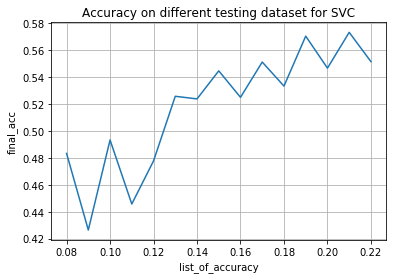

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.518153,0.523257,0.517042
std,0.043879,0.043641,0.045076
min,0.426471,0.430384,0.423861
25%,0.488333,0.500589,0.486031
50%,0.525773,0.527318,0.525297
75%,0.548924,0.553946,0.548446
max,0.573248,0.582053,0.573699


In [17]:
plot(list_of_accuracy,pca_set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SVC')
grid(True)
show()
pca_df = {'Accuracy': pca_set_of_accuracy, 'Precision':pca_set_of_precision, 'F1 Score':pca_set_of_f1}
pca_table = pd.DataFrame(data=pca_df)
pca_table
pca_table.describe()

**Stochastic Gradient Descent with PCA**

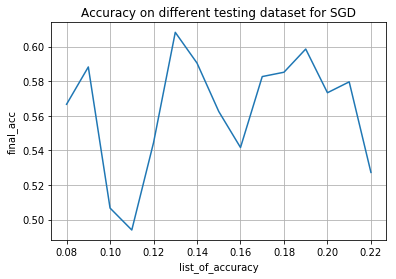

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.563304,0.570270,0.561944
std,0.033800,0.035963,0.033066
min,0.493976,0.498288,0.493535
25%,0.543056,0.545050,0.542485
50%,0.573333,0.587635,0.572119
75%,0.586710,0.592566,0.583874
max,0.608247,0.610432,0.606995


In [18]:
plot(list_of_accuracy,pca_set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()
pca_df_sgd = {'Accuracy': pca_set_of_accuracy_sgd, 'Precision':pca_set_of_precision_sgd, 'F1 Score':pca_set_of_f1_sgd}
pca_table_sgd = pd.DataFrame(data=pca_df_sgd)
pca_table_sgd
pca_table_sgd.describe()

**Gradient Boasting Classifier with PCA**

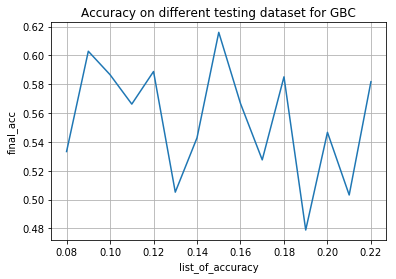

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.555475,0.570270,0.561944
std,0.040065,0.035963,0.033066
min,0.478873,0.498288,0.493535
25%,0.530446,0.545050,0.542485
50%,0.566265,0.587635,0.572119
75%,0.585926,0.592566,0.583874
max,0.616071,0.610432,0.606995


In [19]:
plot(list_of_accuracy,pca_set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()
pca_df_gbc = {'Accuracy': pca_set_of_accuracy_gbc, 'Precision':pca_set_of_precision_gbc, 'F1 Score':pca_set_of_f1_gbc}
pca_table_gbc = pd.DataFrame(data=pca_df_gbc)
pca_table_gbc
pca_table_gbc.describe()

**Random Forest Classifier with PCA**

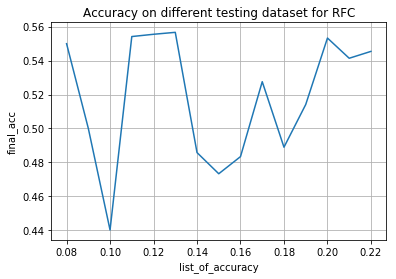

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.517964,0.570270,0.561944
std,0.037231,0.035963,0.033066
min,0.440000,0.498288,0.493535
25%,0.487302,0.545050,0.542485
50%,0.527559,0.587635,0.572119
75%,0.551667,0.592566,0.583874
max,0.556701,0.610432,0.606995


In [20]:
plot(list_of_accuracy,pca_set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()
pca_df_rfc = {'Accuracy': pca_set_of_accuracy_rfc, 'Precision':pca_set_of_precision_rfc, 'F1 Score':pca_set_of_f1_rfc}
pca_table_rfc = pd.DataFrame(data=pca_df_rfc)
pca_table_rfc
pca_table_rfc.describe()

**Gaussian Naive Bayes with PCA**

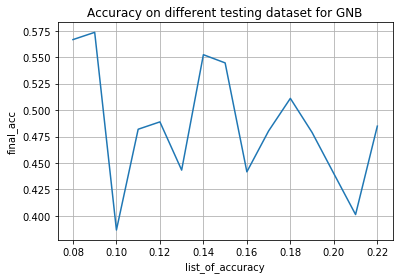

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.485073,0.570270,0.561944
std,0.057129,0.035963,0.033066
min,0.386667,0.498288,0.493535
25%,0.442483,0.545050,0.542485
50%,0.481928,0.587635,0.572119
75%,0.527877,0.592566,0.583874
max,0.573529,0.610432,0.606995


In [21]:
plot(list_of_accuracy,pca_set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GNB')
grid(True)
show()
pca_df_gnb = {'Accuracy': pca_set_of_accuracy_gnb, 'Precision':pca_set_of_precision_gnb, 'F1 Score':pca_set_of_f1_gnb}
pca_table_gnb = pd.DataFrame(data=pca_df_gnb)
pca_table_gnb
pca_table_gnb.describe()

**Decision Tree Classifier with PCA**

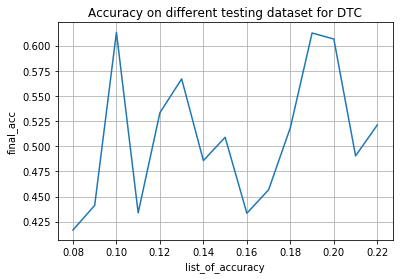

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.509296,0.570270,0.561944
std,0.067351,0.035963,0.033066
min,0.416667,0.498288,0.493535
25%,0.448935,0.545050,0.542485
50%,0.508929,0.587635,0.572119
75%,0.550172,0.592566,0.583874
max,0.613333,0.610432,0.606995


In [22]:
plot(list_of_accuracy,pca_set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for DTC')
grid(True)
show()
pca_df_dtc = {'Accuracy': pca_set_of_accuracy_dtc, 'Precision':pca_set_of_precision_dtc, 'F1 Score':pca_set_of_f1_dtc}
pca_table_dtc = pd.DataFrame(data=pca_df_dtc)
pca_table_dtc
pca_table_dtc.describe()

<B>Comparison of accuracy of all classifier using PCA

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


{'boxes': [<matplotlib.lines.Line2D at 0x7f408bd4ab70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f408bd56390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f408bd56d68>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f408bd56a20>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f408bd4acc0>,
  <matplotlib.lines.Line2D at 0x7f408bd27c18>]}

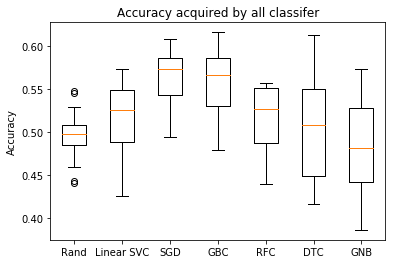

In [23]:
fig = plt.figure()
ylabel('Accuracy')
title('Accuracy acquired by all classifer')
ax = fig.add_subplot(111)
ax.boxplot([accuracy,pca_set_of_accuracy,pca_set_of_accuracy_sgd,pca_set_of_accuracy_gbc,pca_set_of_accuracy_rfc,pca_set_of_accuracy_dtc,pca_set_of_accuracy_gnb], labels=['Rand','Linear SVC', 'SGD','GBC','RFC','DTC','GNB'])

**Single Value Decomposition(SVD)**

In [24]:
#########################################################Test Size####################################################################################
list_of_accuracy = np.array([0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22])
##############################################List of accuracy for classifiers########################################################################
svd_set_of_accuracy=[]
svd_set_of_accuracy_sgd=[]
svd_set_of_accuracy_gbc=[]
svd_set_of_accuracy_rfc=[]
svd_set_of_accuracy_gnb=[]
svd_set_of_accuracy_dtc=[]
#############################################List of precision for classifier#########################################################################
svd_set_of_precision = []
svd_set_of_precision_sgd = []
svd_set_of_precision_gbc = []
svd_set_of_precision_rfc = []
svd_set_of_precision_gnb = []
svd_set_of_precision_dtc = []
############################################List of F1 Score for classifier##########################################################################
svd_set_of_f1 = []
svd_set_of_f1_sgd = []
svd_set_of_f1_gbc = []
svd_set_of_f1_rfc = []
svd_set_of_f1_gnb = []
svd_set_of_f1_dtc = []

############################################Train and testing classifer##############################################################################

for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features_svd = inception.predict(X_train)
    test_features_svd = inception.predict(X_test)
    svd = TruncatedSVD(n_components=550,n_iter=7)
    svd.fit(training_features_svd)
    svd_training_features = svd.fit_transform(training_features_svd)
    svd_test_features=svd.transform(test_features_svd)
    # linear SVC
    clf = Classifier()
    clf.fit(svd_training_features, y_train)
    y_predict = clf.predict(svd_test_features)
    svd_acc_SVC = clf.score(svd_test_features, y_test)
    svd_set_of_accuracy.append(svd_acc_SVC)
    svd_F1 =f1_score(y_test, y_predict, average='weighted')
    svd_precision = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision.append(svd_precision)
    svd_set_of_f1.append(svd_F1)
    # SGD
    svd_clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
    svd_clf_sgd.fit(svd_training_features, y_train)
    y_predict = svd_clf_sgd.predict(svd_test_features)
    svd_acc_sgd = svd_clf_sgd.score(svd_test_features, y_test)
    svd_set_of_accuracy_sgd.append(svd_acc_sgd)
    svd_F1_sgd =f1_score(y_test, y_predict, average='weighted')
    svd_precision_sgd = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_sgd.append(svd_precision_sgd)
    svd_set_of_f1_sgd.append(svd_F1_sgd)
#     #GBC
    svd_clf_gbc = GradientBoostingClassifier()
    svd_clf_gbc.fit(svd_training_features, y_train)
    y_predict_gbc = svd_clf_gbc.predict(svd_test_features)
    svd_acc_gbc = svd_clf_gbc.score(svd_test_features, y_test)
    svd_set_of_accuracy_gbc.append(svd_acc_gbc)
    svd_F1_gbc =f1_score(y_test, y_predict, average='weighted')
    svd_precision_gbc = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_gbc.append(svd_precision_gbc)
    svd_set_of_f1_gbc.append(svd_F1_gbc)
#     # RFC
    svd_rfc_clf =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    svd_rfc_clf.fit(svd_training_features, y_train)
    y_predict_regr = svd_rfc_clf.predict(svd_test_features)
    svd_acc_regr = svd_rfc_clf.score(svd_test_features, y_test)
    svd_set_of_accuracy_rfc.append(svd_acc_regr)
    svd_F1_rfc =f1_score(y_test, y_predict, average='weighted')
    svd_precision_rfc = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_rfc.append(svd_precision_rfc)
    svd_set_of_f1_rfc.append(svd_F1_rfc)
#     # NB
    svd_clf_gnb = GaussianNB()
    svd_clf_gnb.fit(svd_training_features, y_train)
    y_predict_gnb = svd_clf_gnb.score(svd_test_features, y_test)
    svd_acc_gnb = svd_clf_gnb.score(svd_test_features, y_test)
    svd_set_of_accuracy_gnb.append(svd_acc_gnb)
    svd_F1_gnb =f1_score(y_test, y_predict, average='weighted')
    svd_precision_gnb = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_gnb.append(svd_precision_gnb)
    svd_set_of_f1_gnb.append(svd_F1_gnb)
#     # DTC
    svd_clf_dtc = DecisionTreeClassifier(random_state=0)
    svd_clf_dtc.fit(svd_training_features, y_train)
    y_predict_dtc = svd_clf_dtc.score(svd_test_features, y_test)
    svd_acc_dtc = svd_clf_dtc.score(svd_test_features, y_test)
    svd_set_of_accuracy_dtc.append(svd_acc_dtc) 
    svd_F1_dtc =f1_score(y_test, y_predict, average='weighted')
    svd_precision_dtc = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_dtc.append(svd_precision_dtc)
    svd_set_of_f1_dtc.append(svd_F1_dtc)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Liner SVC with SVD**

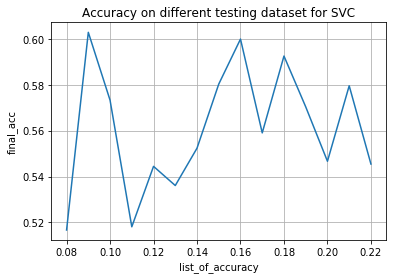

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.561206,0.567969,0.555688
std,0.027345,0.037450,0.027008
min,0.516667,0.508882,0.498435
25%,0.544949,0.549648,0.540253
50%,0.559055,0.561276,0.557843
75%,0.579987,0.581874,0.574016
max,0.602941,0.663206,0.593939


In [25]:
plot(list_of_accuracy,svd_set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SVC')
grid(True)
show()
svd_df = {'Accuracy': svd_set_of_accuracy, 'Precision':svd_set_of_precision, 'F1 Score':svd_set_of_f1}
svd_table = pd.DataFrame(data=svd_df)
svd_table
svd_table.describe()

**Stochastic Gradient Descent with SVD**

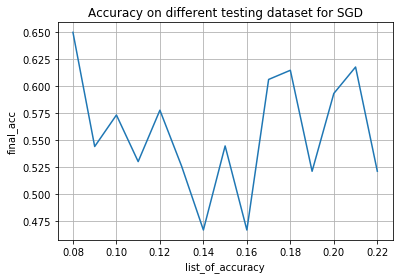

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.556915,0.586931,0.497300
std,0.054146,0.098590,0.102235
min,0.466667,0.359406,0.316196
25%,0.523493,0.568730,0.441079
50%,0.544643,0.613746,0.486901
75%,0.599816,0.636649,0.576740
max,0.650000,0.753861,0.650490


In [26]:
plot(list_of_accuracy,svd_set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()
svd_df_sgd = {'Accuracy': svd_set_of_accuracy_sgd, 'Precision':svd_set_of_precision_sgd, 'F1 Score':svd_set_of_f1_sgd}
svd_table_sgd = pd.DataFrame(data=svd_df_sgd)
svd_table_sgd
svd_table_sgd.describe()

**Gradient Boasting Classifier with SVD**

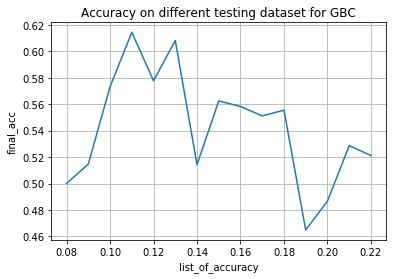

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.542114,0.586931,0.497300
std,0.042900,0.098590,0.102235
min,0.464789,0.359406,0.316196
25%,0.514496,0.568730,0.441079
50%,0.551181,0.613746,0.486901
75%,0.567917,0.636649,0.576740
max,0.614458,0.753861,0.650490


In [27]:
plot(list_of_accuracy,svd_set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()
svd_df_gbc = {'Accuracy': svd_set_of_accuracy_gbc, 'Precision':svd_set_of_precision_gbc, 'F1 Score':svd_set_of_f1_gbc}
svd_table_gbc = pd.DataFrame(data=svd_df_gbc)
svd_table_gbc
svd_table_gbc.describe()

**Random Forest Classifier with SVD**

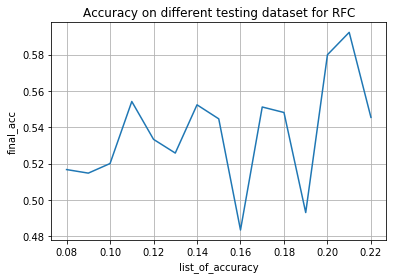

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.537010,0.586931,0.497300
std,0.029351,0.098590,0.102235
min,0.483333,0.359406,0.316196
25%,0.518333,0.568730,0.441079
50%,0.544643,0.613746,0.486901
75%,0.551781,0.636649,0.576740
max,0.592357,0.753861,0.650490


In [28]:
plot(list_of_accuracy,svd_set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()
svd_df_rfc = {'Accuracy': svd_set_of_accuracy_rfc, 'Precision':svd_set_of_precision_rfc, 'F1 Score':svd_set_of_f1_rfc}
svd_table_rfc = pd.DataFrame(data=svd_df_rfc)
svd_table_rfc
svd_table_rfc.describe()

**Gaussian Naive Bayes with SVD**

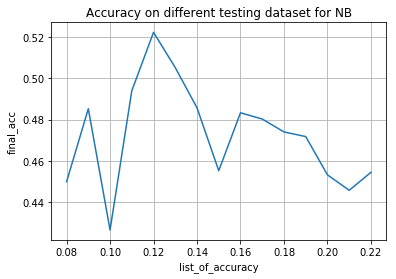

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.472512,0.586931,0.497300
std,0.025099,0.098590,0.102235
min,0.426667,0.359406,0.316196
25%,0.453939,0.568730,0.441079
50%,0.474074,0.613746,0.486901
75%,0.485504,0.636649,0.576740
max,0.522222,0.753861,0.650490


In [29]:
plot(list_of_accuracy,svd_set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for NB')
grid(True)
show()
svd_df_gnb = {'Accuracy': svd_set_of_accuracy_gnb, 'Precision':svd_set_of_precision_gnb, 'F1 Score':svd_set_of_f1_gnb}
svd_table_gnb = pd.DataFrame(data=svd_df_gnb)
svd_table_gnb
svd_table_gnb.describe()

**Decision Tree Classifier with SVD**

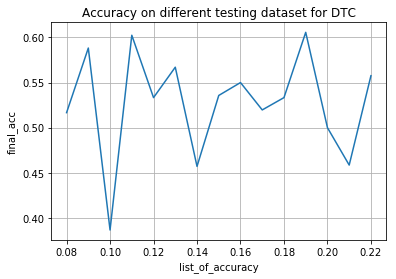

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.527467,0.586931,0.497300
std,0.059148,0.098590,0.102235
min,0.386667,0.359406,0.316196
25%,0.508333,0.568730,0.441079
50%,0.533333,0.613746,0.486901
75%,0.562293,0.636649,0.576740
max,0.605634,0.753861,0.650490


In [30]:
plot(list_of_accuracy,svd_set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for DTC')
grid(True)
show()
svd_df_dtc = {'Accuracy': svd_set_of_accuracy_dtc, 'Precision':svd_set_of_precision_dtc, 'F1 Score':svd_set_of_f1_dtc}
svd_table_dtc = pd.DataFrame(data=svd_df_dtc)
svd_table_dtc
svd_table_dtc.describe()

**Linear SVC classifier graph for Normal , PCA and SVD**

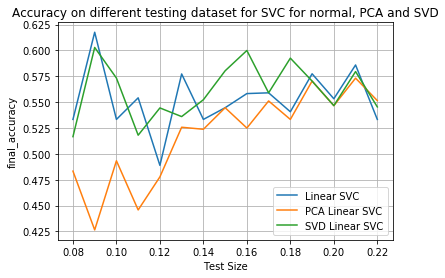

In [31]:
import pylab 
plot(list_of_accuracy,set_of_accuracy,label = 'Linear SVC')
plot(list_of_accuracy,pca_set_of_accuracy,label = 'PCA Linear SVC')
plot(list_of_accuracy,svd_set_of_accuracy, label = 'SVD Linear SVC')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for SVC for normal, PCA and SVD')
grid(True)

**Stochastic Gradient Descent with PCA classifier for Normal , PCA and SVD**

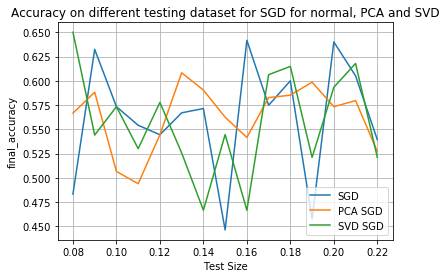

In [32]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_sgd,label = 'SGD')
plot(list_of_accuracy,pca_set_of_accuracy_sgd,label = 'PCA SGD')
plot(list_of_accuracy,svd_set_of_accuracy_sgd, label = 'SVD SGD')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for SGD for normal, PCA and SVD')
grid(True)

**Gradient Boasting Classifier for Normal,PCA and SVD**

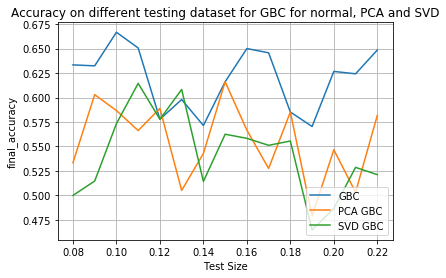

In [33]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_gbc,label = 'GBC')
plot(list_of_accuracy,pca_set_of_accuracy_gbc,label = 'PCA GBC')
plot(list_of_accuracy,svd_set_of_accuracy_gbc, label = 'SVD GBC')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for GBC for normal, PCA and SVD')
grid(True)

**Random Forest Classifier for Normal,PCA and SVD**

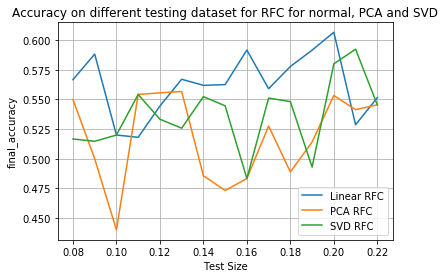

In [34]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_rfc,label = 'Linear RFC')
plot(list_of_accuracy,pca_set_of_accuracy_rfc,label = 'PCA RFC')
plot(list_of_accuracy,svd_set_of_accuracy_rfc, label = 'SVD RFC')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for RFC for normal, PCA and SVD')
grid(True)

**Gaussian Naive Bayes classifier for Normal,PCA and SVD**

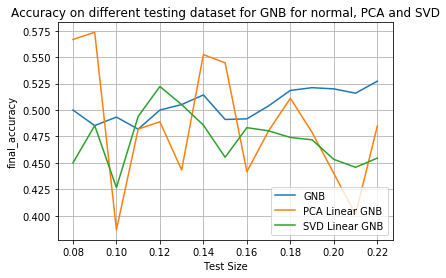

In [35]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_gnb,label = 'GNB')
plot(list_of_accuracy,pca_set_of_accuracy_gnb,label = 'PCA Linear GNB')
plot(list_of_accuracy,svd_set_of_accuracy_gnb, label = 'SVD Linear GNB')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for GNB for normal, PCA and SVD')
grid(True)

**Decision Tree Classifier for Normal,PCA and SVD**

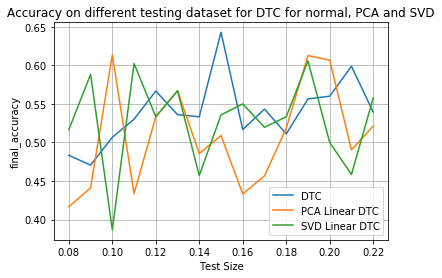

In [36]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_dtc,label = 'DTC')
plot(list_of_accuracy,pca_set_of_accuracy_dtc,label = 'PCA Linear DTC')
plot(list_of_accuracy,svd_set_of_accuracy_dtc, label = 'SVD Linear DTC')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for DTC for normal, PCA and SVD')
grid(True)

<B>Comparison of accuracy of all classifier using SVD

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


{'boxes': [<matplotlib.lines.Line2D at 0x7f408b73b208>,
 'caps': [<matplotlib.lines.Line2D at 0x7f408b73b9e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f408b6c4400>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f408b6c40b8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f408b73b358>,
  <matplotlib.lines.Line2D at 0x7f408b6962b0>]}

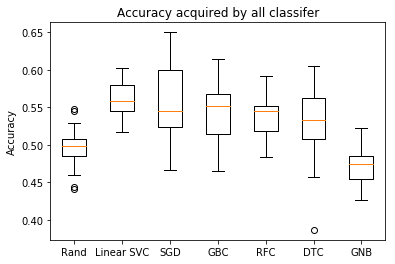

In [37]:
fig = plt.figure()
ylabel('Accuracy')
title('Accuracy acquired by all classifer')
ax = fig.add_subplot(111)
ax.boxplot([accuracy,svd_set_of_accuracy,svd_set_of_accuracy_sgd,svd_set_of_accuracy_gbc,svd_set_of_accuracy_rfc,svd_set_of_accuracy_dtc,svd_set_of_accuracy_gnb], labels=['Rand','Linear SVC', 'SGD','GBC','RFC','DTC','GNB'])